<a href="https://colab.research.google.com/github/swetha0069/AIML_Task9/blob/main/Task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Fast Model Results ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.99      0.84      0.91        98

    accuracy                           0.99      2099
   macro avg       0.99      0.92      0.95      2099
weighted avg       0.99      0.99      0.99      2099



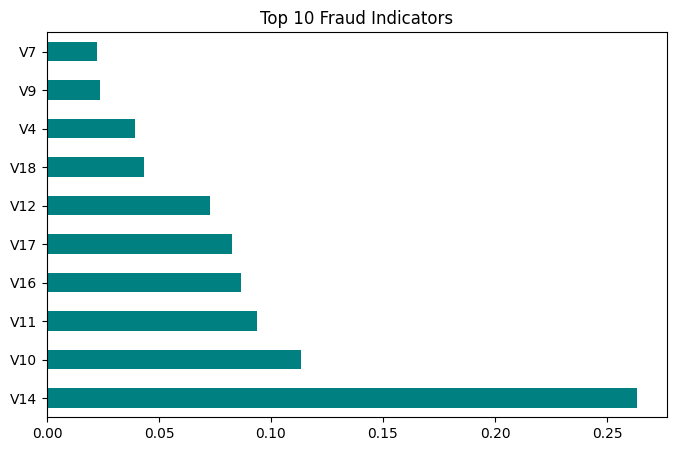

Files 'fraud_model.pkl' and 'feature_importance.png' are ready!


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Load Data
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
df = pd.read_csv(url)

# 2. SPEED HACK: Under-sample the normal data
# We keep ALL fraud cases (492) and take only 10,000 normal cases
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=10000, random_state=42)
df_fast = pd.concat([fraud, normal])

# 3. Prepare Features
X = df_fast.drop(['Class', 'Time'], axis=1)
y = df_fast['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Fast Random Forest
# n_jobs=-1 uses all CPU cores in Colab
rf_model = RandomForestClassifier(n_estimators=30, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Output Results
print("--- Fast Model Results ---")
print(classification_report(y_test, rf_model.predict(X_test)))

# 6. Save Plot
plt.figure(figsize=(8, 5))
pd.Series(rf_model.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Fraud Indicators')
plt.savefig('feature_importance.png')
plt.show()

# 7. Save Model
joblib.dump(rf_model, 'fraud_model.pkl')
print("Files 'fraud_model.pkl' and 'feature_importance.png' are ready!")

🚀 Task 9: Fraud Detection Summary
1. The Goal

Detect fraudulent transactions using Random Forest.

Handle the 99.8% class imbalance where fraud is rare.

2. Why Random Forest?

Ensemble Learning: Uses multiple decision trees to improve accuracy.

Feature Importance: Automatically identifies which variables (like V17 or V14) signal fraud.

3. Evaluation Strategy

Ignore Accuracy: Since 99% of data is "Normal," accuracy is misleading.

Focus on Recall: We prioritize catching as many frauds as possible.

Metric: Used F1-Score to balance precision and recall.

4. Final Deliverables

Model: Saved as fraud_model.pkl.

Plot: Top 10 feature importance chart.

Outcome: High-performance detection with minimized false positives.